<a href="https://colab.research.google.com/github/yleessam/2501_dl_env_colab/blob/main/3_%ED%99%9C%EC%84%B1%ED%99%94_%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

25.1.12 로컬 테스트완료
활성화 함수의 동작원리 구현 > 시각화, 케라스에서 층마다 활성화 함수 지정하기

# 활성화 함수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Binary Step

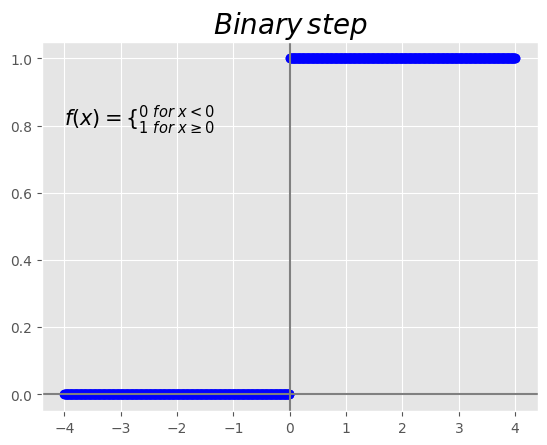

In [2]:
x = np.linspace(start=-4, stop=4, num=1000)
y = [1 if data>=0 else 0 for data in x]

plt.plot(x, y, 'o', c='blue')
plt.axvline(0, c='grey')
plt.axhline(0, c='grey')
plt.title(r'$Binary\/step$', fontsize=20)
plt.text(-4, 0.8, r'$f(x)=\{ \genfrac{}{}{0}{}{0 \/\/ for \/\/ x<0}{1 \/\/ for \/\/ x \geq 0 }$', fontsize=15)
plt.show()

## sigmoid

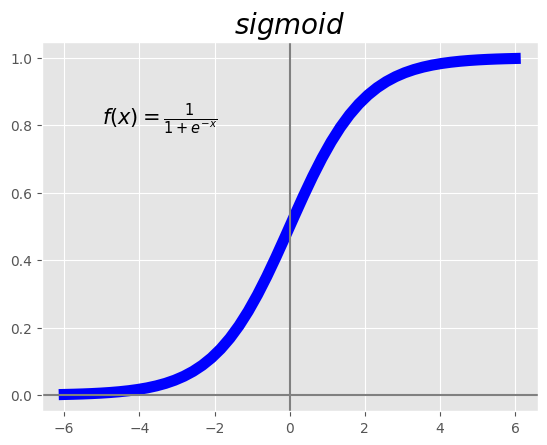

In [3]:
x = np.linspace(start=-6, stop=6, num=50)
y = 1/(1+np.exp(-x))
plt.plot(x, y, c="blue", lw=8)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")
plt.title(r"$sigmoid$", fontsize=20)
plt.text(-5, 0.8, r"$f(x)=\frac{1}{1+e^{-x}}$", fontsize=15)
plt.show()

## tanh

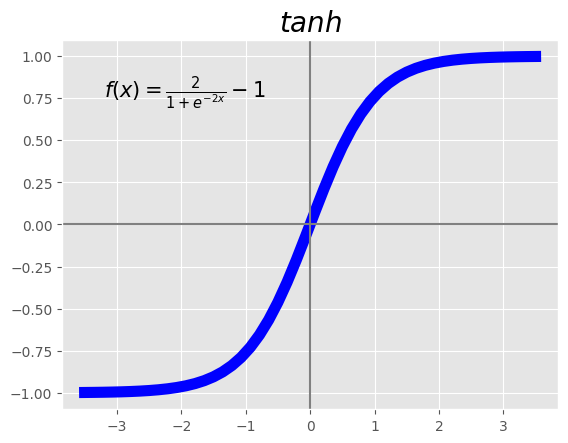

In [4]:
x = np.linspace(start=-3.5, stop=3.5, num=50)
y = np.tanh(x)
plt.plot(x, y, c="blue", lw=8)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")
plt.title(r"$tanh$", fontsize=20)
plt.text(-3.2, 0.75, r"$f(x)=\frac{2}{1+e^{-2x}}-1$", fontsize=15)
plt.show()

## softmax

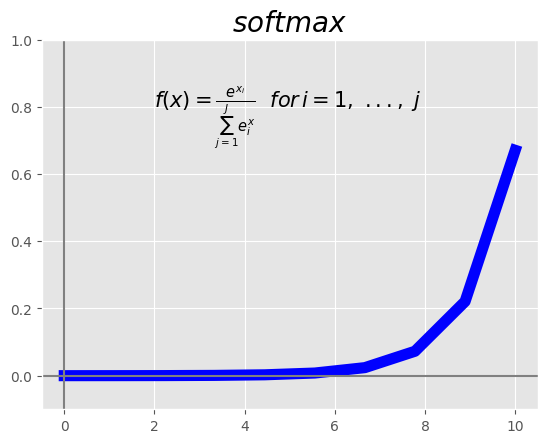

In [5]:
x = np.linspace(start=0, stop=10, num=10)
def softmax(input):
    return np.exp(input) / (np.sum(np.exp(input)))
y = softmax(x)
plt.plot(x, y, c="blue", lw=8)
plt.ylim(-0.1, 1)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")
plt.title(r"$softmax$", fontsize=20)
plt.text(2, 0.8,
         r"$f(x)=\frac{e^{x_i}}{\sum_{j=1}^J e^x_i}\/\/ \/\/ for\/ i=1,\/\/...,\/\/j$",
         fontsize=15)
plt.show()

## ReLU

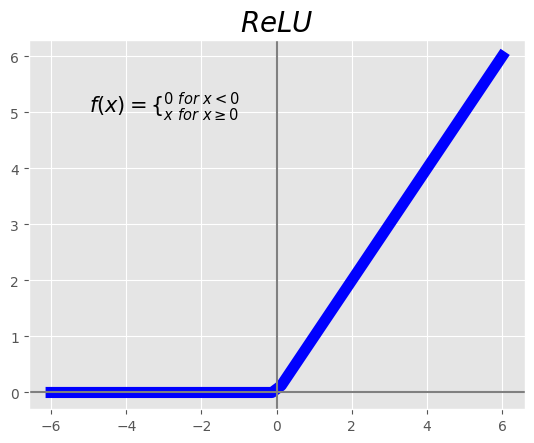

In [6]:
x = np.linspace(start=-6, stop=6, num=50)
y = [ data if data>=0 else 0 for data in x]
plt.plot(x, y, c="blue", lw=8)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")
plt.title(r"$ReLU$", fontsize=20)
plt.text(-5, 5, r"$f(x)=\{ \genfrac{}{}{0}{}{0 \/\/ for \/\/ x<0}{x \/\/ for \/\/ x\geq0 } $",
         fontsize=15)
plt.show()

## Gaussian

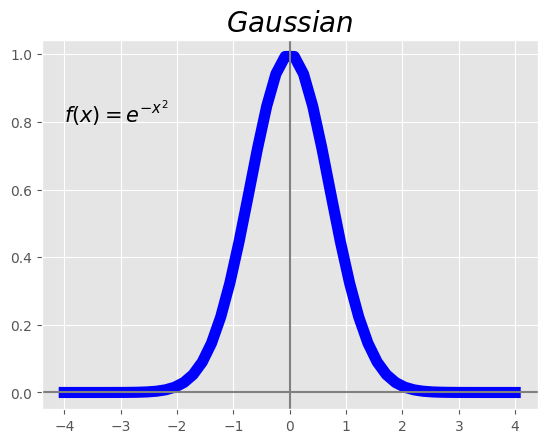

In [7]:
x = np.linspace(start=-4, stop=4, num=50)
y = np.exp(-(x**2))
plt.plot(x, y, c="blue", lw=8)
# plt.ylim(-0.5,2)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")
plt.title(r"$Gaussian$", fontsize=20)
plt.text(-4, 0.8, r"$f(x)=e^{-x^2 }$", fontsize=15)
plt.show()

## LeakyReLU

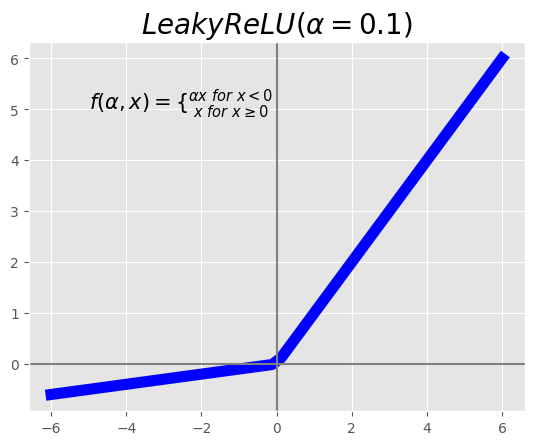

In [8]:
x = np.linspace(start=-6, stop=6, num=50)
y = [ data if data>=0 else 0.1*data for data in x]
plt.plot(x, y, c="blue", lw=8)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")
plt.title(r"$LeakyReLU(\alpha=0.1)$", fontsize=20)
plt.text(-5, 5,
         r"$f(\alpha,x)=\{ \genfrac{}{}{0}{}{\alpha x \/\/ for \/\/ x<0}{x \/\/ for \/\/ x \geq 0 }$",
         fontsize=15)
plt.show()

## ELU

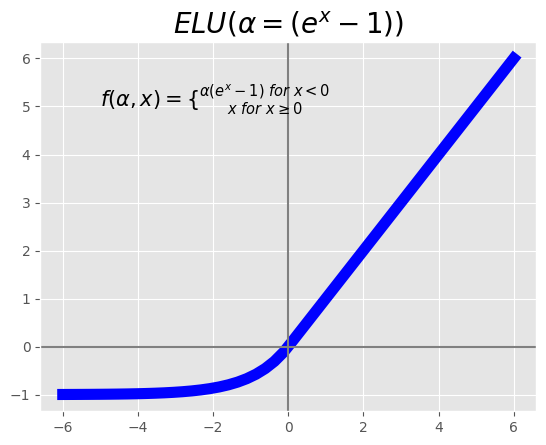

In [9]:
x = np.linspace(start=-6, stop=6, num=50)
y = [ data if data>=0 else 1*(np.e**data-1) for data in x]
plt.plot(x, y, c="blue", lw=8)
plt.axvline(0, c="grey")
plt.axhline(0, c="grey")
plt.title(r"$ELU(\alpha=(e^x -1))$", fontsize=20)
plt.text(-5, 5,
         r"$f(\alpha,x)=\{\genfrac{}{}{0}{}{\alpha (e^x -1) \/\/ for \/\/ x<0}{x \/\/ for \/\/ x \geq 0 }$",
         fontsize=15)
plt.show()

## 케라스에서 활성화 함수 사용

In [10]:
from tensorflow.keras.activations import softmax
from tensorflow.keras.layers import ELU, PReLU, Input, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
elu = ELU(alpha=1)
model.add(Input(shape=(4,)))
model.add(Dense(50, activation="sigmoid")) # 문자열 이용
model.add(Dense(50, activation=PReLU()))   # 객체 이용
model.add(Dense(30, activation=elu))       # 객체 이용
model.add(Dense(3, activation=softmax))    # 함수이름 이용
print(model.to_json())

{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 4], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "units": 50, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint"

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │           1,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              93 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,423 (17.28 KB)

 Trainable params: 4,423 (17.28 KB)

 Non-trainable params: 0 (0.00 B)